#  Problem Statement :
# Predict the Burned Area of Forest Fire with Neural Networks.

In [1]:
!pip install tensorflow


In [2]:
!pip install keras-tuner


In [3]:
!pip install scikeras


In [4]:
# Importing the required libraries for the dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import set_printoptions
from collections import Counter

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from tensorflow import keras
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam
from tensorflow.keras import layers
from keras.models import Sequential
from keras_tuner.tuners import RandomSearch
from scikeras.wrappers import KerasClassifier

import warnings
warnings.filterwarnings("ignore")

In [5]:
# Reading the dataset

forestfires=pd.read_csv("forestfires (1).csv")
pd.set_option("display.max_columns",31)

In [6]:
forestfires

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [7]:
forestfires_data = forestfires.drop(forestfires.columns[[11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]], axis=1)


In [8]:
forestfires_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


# About the Dataset
### month : Month of the year: 'jan' to 'dec'
### day : Day of the week: 'mon' to 'sun'
### FFMC : Fine Fuel Moisture Code index from the FWI system: 18.7 to 96.20
### DMC : Duff Moisture Code index from the FWI system: 1.1 to 291.3
### DC : Drought Code index from the FWI system: 7.9 to 860.6
### ISI : Initial Spread Index from the FWI system: 0.0 to 56.10
### temp : Temperature in Celsius degrees: 2.2 to 33.30
### RH : Relative humidity in percentage: 15.0 to 100
### wind : Wind speed in km/h: 0.40 to 9.40
### rain : Outside rain in mm/m2 : 0.0 to 6.4
### area : The burned area of the forest (in ha): 0.00 to 1090.84 

In [9]:
forestfires_data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [10]:
forestfires_data.tail()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small
516,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00,small


In [11]:
forestfires_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


In [12]:
forestfires_data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [13]:
forestfires_data.value_counts()

month  day  FFMC  DMC    DC     ISI   temp  RH  wind  rain  area    size_category
aug    fri  91.0  166.9  752.6  7.1   25.9  41  3.6   0.0   0.00    small            2
       sat  93.7  231.1  715.1  8.4   18.9  64  4.9   0.0   0.00    small            2
       sun  91.4  142.4  601.4  10.6  19.8  39  5.4   0.0   0.00    small            2
       thu  91.6  248.4  753.8  6.3   20.4  56  2.2   0.0   0.00    small            2
jun    fri  91.1  94.1   232.1  7.1   19.2  38  4.5   0.0   0.00    small            2
                                                                                    ..
aug    wed  92.1  111.2  654.1  9.6   16.6  47  0.9   0.0   2.29    small            1
                                                            0.00    small            1
            91.7  191.4  635.9  7.8   26.2  36  4.5   0.0   185.76  large            1
                                      19.9  50  4.0   0.0   82.75   large            1
sep    wed  94.3  85.1   692.3  15.9  25.9  24  

In [14]:
forestfires_data.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84


In [15]:
# Missing Values

forestfires_data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [16]:
# Duplicated Values

forestfires_data[forestfires_data.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,0.00,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,0.00,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,small


In [17]:
# Types of variables

# List of Numerical Variables

numerical_features=[feature for feature in forestfires_data.columns if forestfires_data[feature].dtypes!="O"]
print("Number of numerical variables:",len(numerical_features))

# Visualize the numerical variables

forestfires_data[numerical_features].head()

Number of numerical variables: 9


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [18]:
# Discrete

discrete_feature=[feature for feature in numerical_features if len(forestfires_data[feature].unique())<25]
print("Discrete Variables Count:{}".format(len(discrete_feature)))

Discrete Variables Count:2


In [19]:
# Continuous 

continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous Feature Count{}".format(len(continuous_feature)))

Continuous Feature Count7


In [20]:
# Categorical Variables

categorical = [var for var in forestfires_data.columns if forestfires_data[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

There are 3 categorical variables

The categorical variables are :

 ['month', 'day', 'size_category']


In [21]:
# Frequency counts of categorical variables
    
for var in categorical:
    print(forestfires_data[var].value_counts())

month
aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: count, dtype: int64
day
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: count, dtype: int64
size_category
small    378
large    139
Name: count, dtype: int64


In [22]:

for var in categorical:
    print(forestfires_data[var].value_counts()/np.float64(len(forestfires_data)))
    
    

month
aug    0.355899
sep    0.332689
mar    0.104449
jul    0.061896
feb    0.038685
jun    0.032882
oct    0.029014
apr    0.017408
dec    0.017408
jan    0.003868
may    0.003868
nov    0.001934
Name: count, dtype: float64
day
sun    0.183752
fri    0.164410
sat    0.162476
mon    0.143133
tue    0.123791
thu    0.117988
wed    0.104449
Name: count, dtype: float64
size_category
small    0.731141
large    0.268859
Name: count, dtype: float64


In [23]:
for var in categorical:
    print(var,"contains",len(forestfires_data[var].unique()),"labels")

month contains 12 labels
day contains 7 labels
size_category contains 2 labels


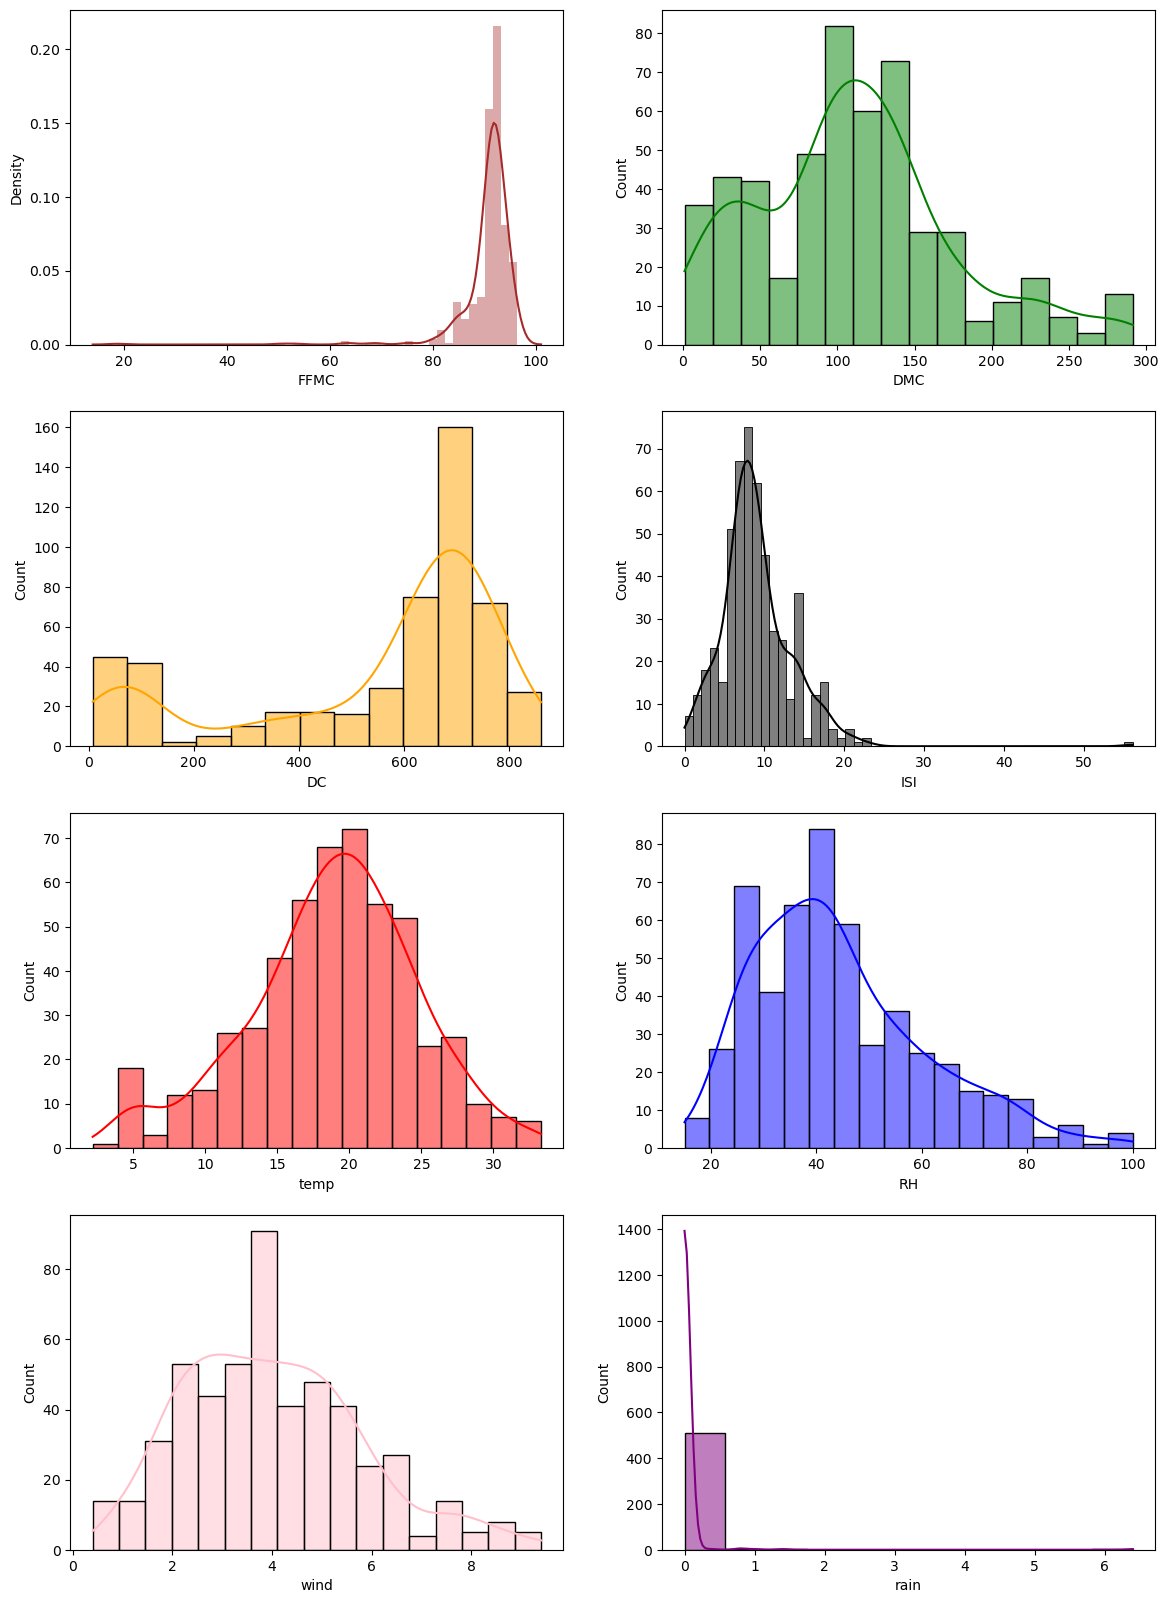

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 2, figsize=(14, 20))
sns.distplot(forestfires_data.FFMC, ax = ax[0,0],color="brown")
sns.histplot(forestfires_data.DMC, kde=True, ax=ax[0, 1],color="green")
sns.histplot(forestfires_data.DC, kde=True, ax=ax[1, 0],color="orange")
sns.histplot(forestfires_data.ISI, kde=True, ax=ax[1, 1],color="black")
sns.histplot(forestfires_data.temp, kde=True, ax=ax[2, 0],color="red")
sns.histplot(forestfires_data.RH, kde=True, ax=ax[2, 1],color="blue")
sns.histplot(forestfires_data.wind, kde=True, ax=ax[3, 0],color="pink")
sns.histplot(forestfires_data.rain, kde=True, ax=ax[3, 1],color="purple")

plt.show()  



In [25]:
# Outliers Detection

def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in df.columns.tolist():
        Q1 = np.percentile(df[col],25)    # 1st quartile (25%)
        Q3 = np.percentile(df[col],75)    # 3rd quartile (75%)
        IQR = Q3 - Q1                     # Interquartile rrange (IQR)
        
        outlier_step = 1.5 * IQR          # outlier step
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(forestfires[continuous_feature]))))


The dataset contains 3 observations with more than 2 outliers


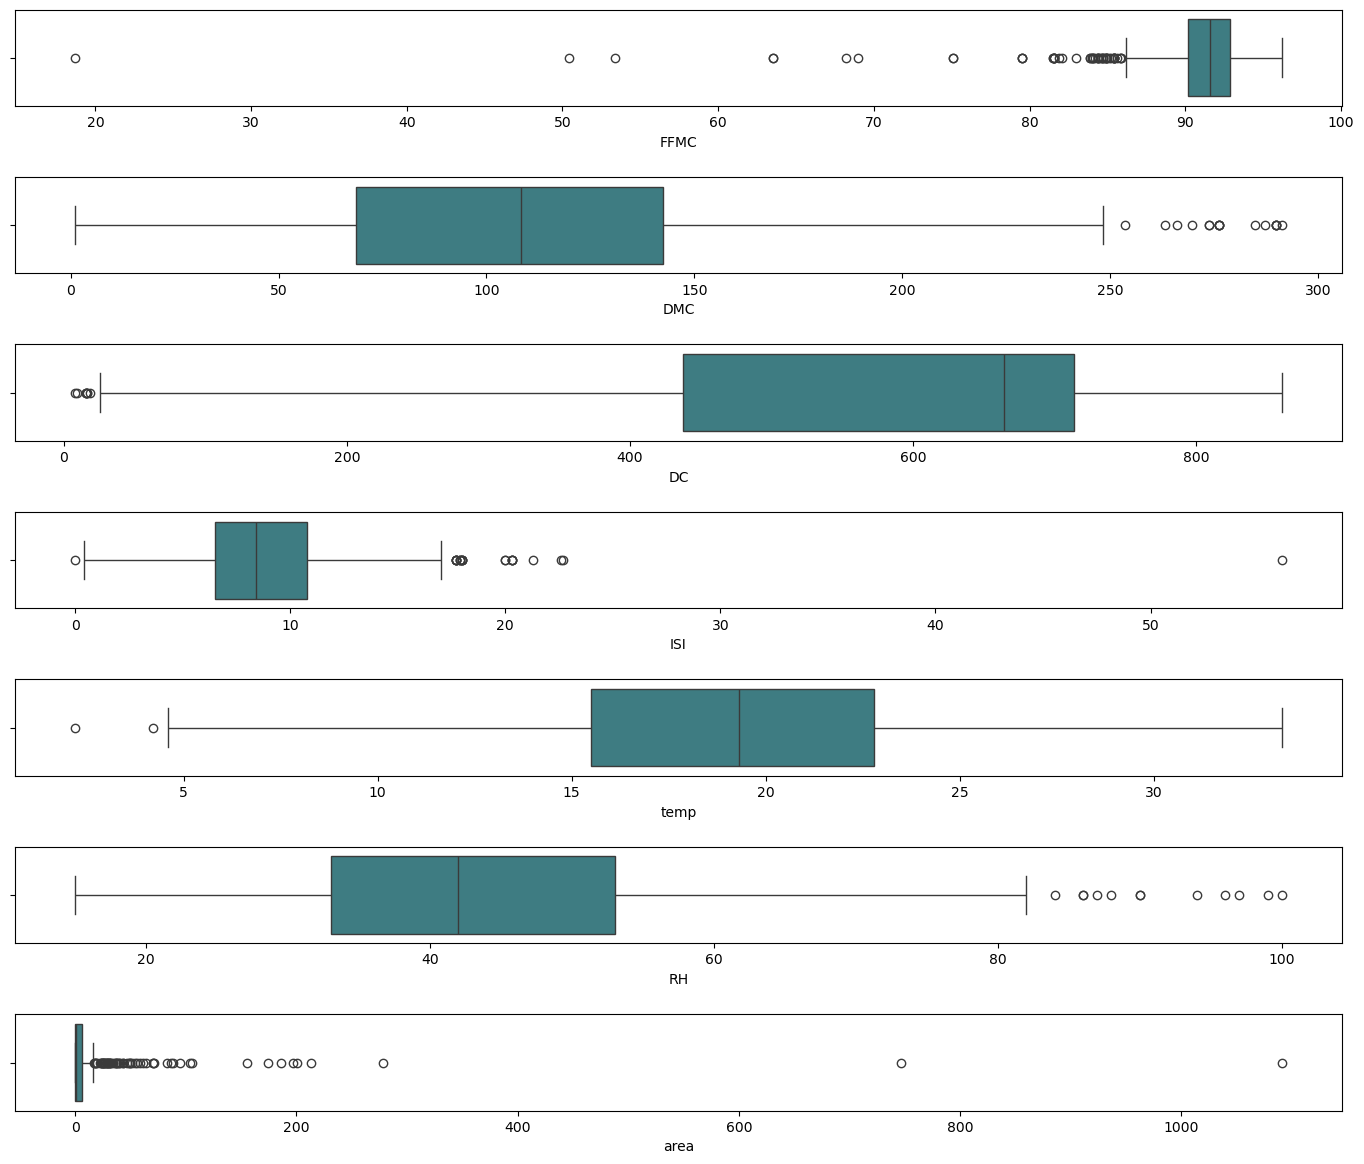

In [26]:
outlier = forestfires_data.copy() 
fig, axes=plt.subplots(7,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='FFMC',data=outlier,palette='crest',ax=axes[0])
sns.boxplot(x='DMC',data=outlier,palette='crest',ax=axes[1])
sns.boxplot(x='DC',data=outlier,palette='crest',ax=axes[2])
sns.boxplot(x='ISI',data=outlier,palette='crest',ax=axes[3])
sns.boxplot(x='temp',data=outlier,palette='crest',ax=axes[4])
sns.boxplot(x='RH',data=outlier,palette='crest',ax=axes[5])
sns.boxplot(x='area',data=outlier,palette='crest',ax=axes[6])
plt.tight_layout(pad=2.0)

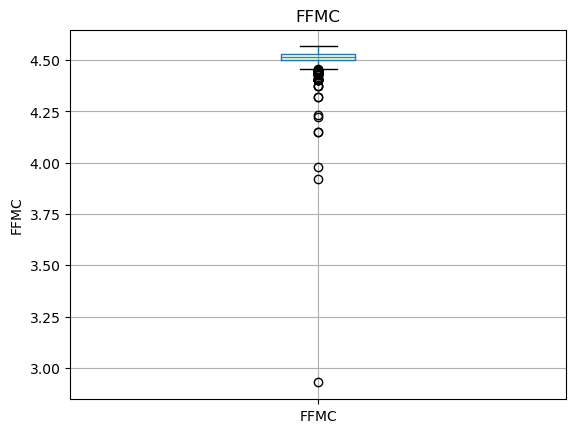

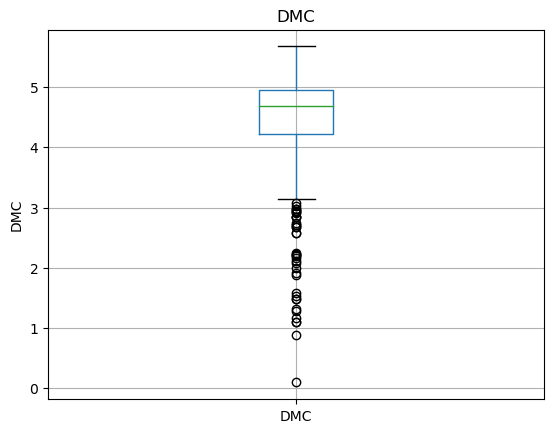

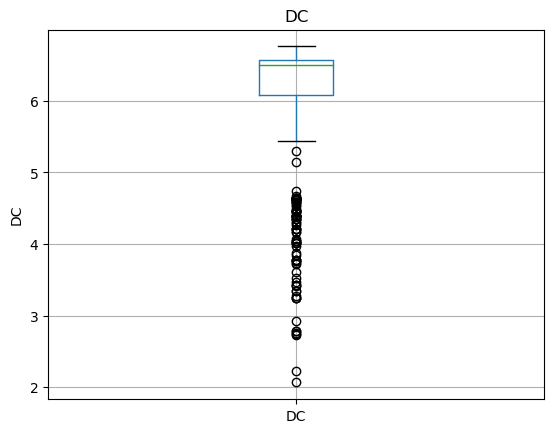

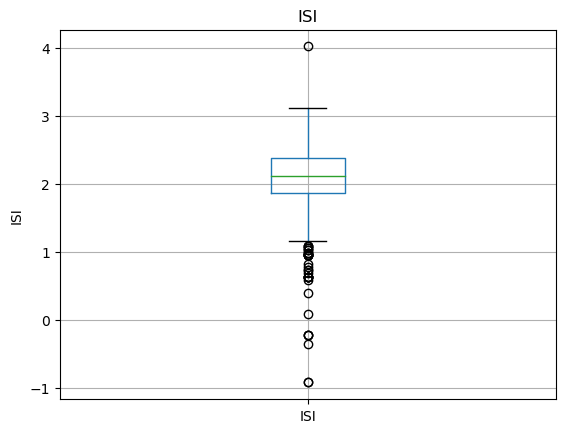

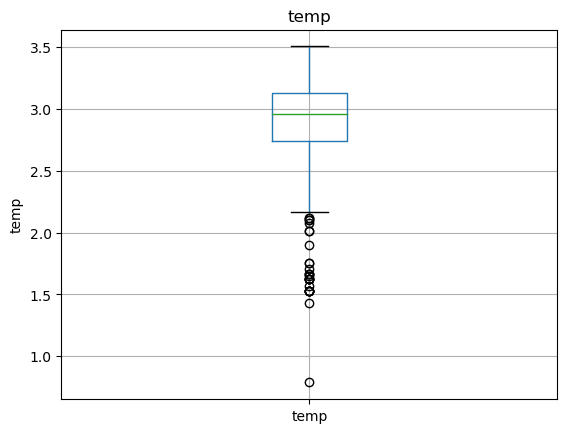

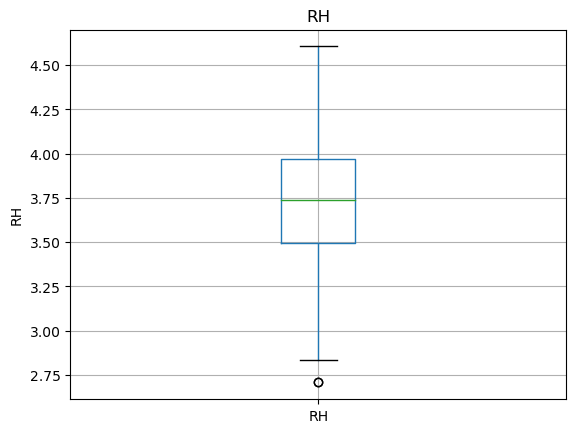

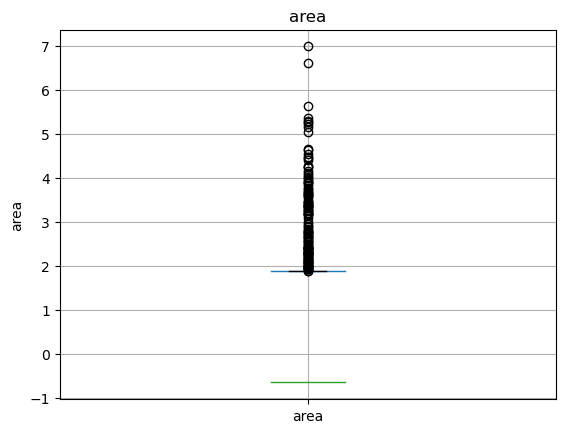

In [27]:
# After Log-Transformation

for feature in continuous_feature:
    data=forestfires.copy()
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

Skew:12.846933533934868
Kutosis:194.1407210942299


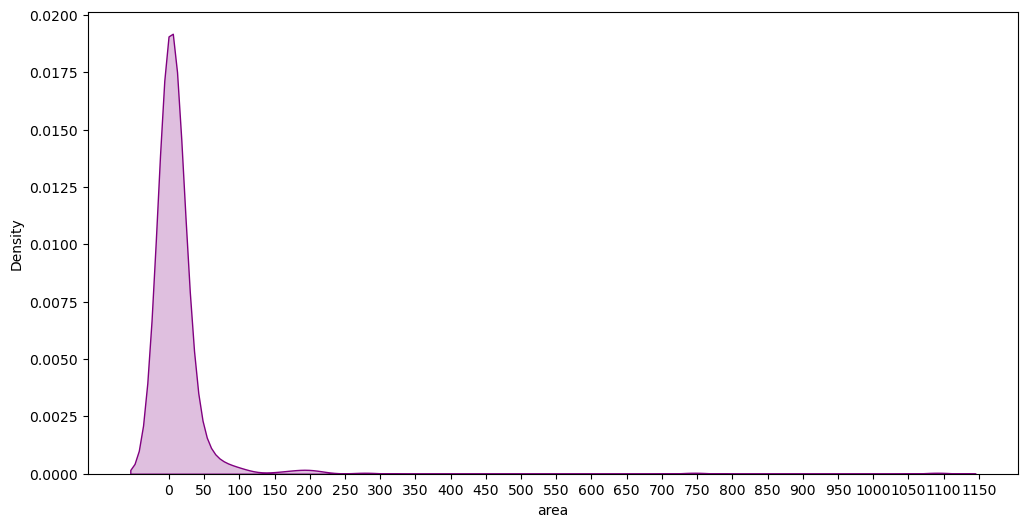

In [28]:
# 4.3 Visualize the distribution of 'Area' and taking insights

plt.figure(figsize=(12,6))
print("Skew:{}".format(forestfires_data["area"].skew()))
print("Kutosis:{}".format(forestfires_data["area"].kurtosis()))
ax=sns.kdeplot(forestfires_data["area"],shade=True,color="purple")
plt.xticks([i for i in range(0,1200,50)])
plt.show()

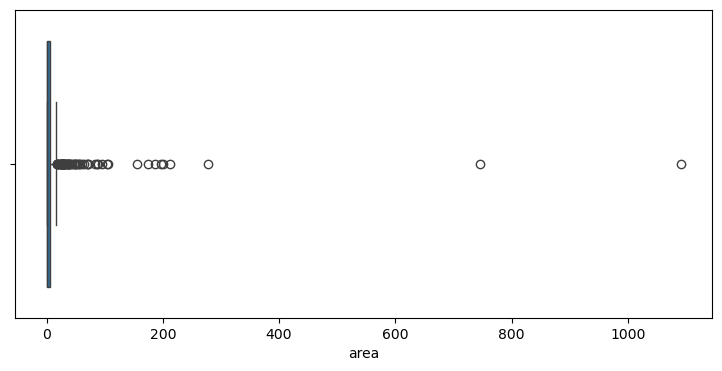

In [29]:

plt.figure(figsize=(9,4))
sns.boxplot(forestfires_data["area"],orient="h");

In [30]:
# Categorical Variables

categorical_features=[feature for feature in forestfires_data.columns if forestfires_data[feature].dtype=="O"]
print("Number of Categorical Features:",len(categorical_features),"\n",categorical_features)
forestfires[categorical_features].head()

Number of Categorical Features: 3 
 ['month', 'day', 'size_category']


,month,day,size_category
0,mar,fri,small
1,oct,tue,small
2,oct,sat,small
3,mar,fri,small
4,mar,sun,small


In [31]:
for feature in categorical_features:
    print("{} number of unique categories in feature named {}".format(len(forestfires_data[feature].unique()),feature))

12 number of unique categories in feature named month
7 number of unique categories in feature named day
2 number of unique categories in feature named size_category


In [32]:
# Decide which categorical variables you want to use in model

for feature in forestfires_data.columns:
    if forestfires_data[feature].dtypes == 'object':      # in pandas it is object
        unique_cat = len(forestfires_data[feature].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=feature, unique_cat=unique_cat))
        print(forestfires_data[feature].value_counts())
        print()


Feature 'month' has 12 unique categories
month
aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: count, dtype: int64

Feature 'day' has 7 unique categories
day
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: count, dtype: int64

Feature 'size_category' has 2 unique categories
size_category
small    378
large    139
Name: count, dtype: int64



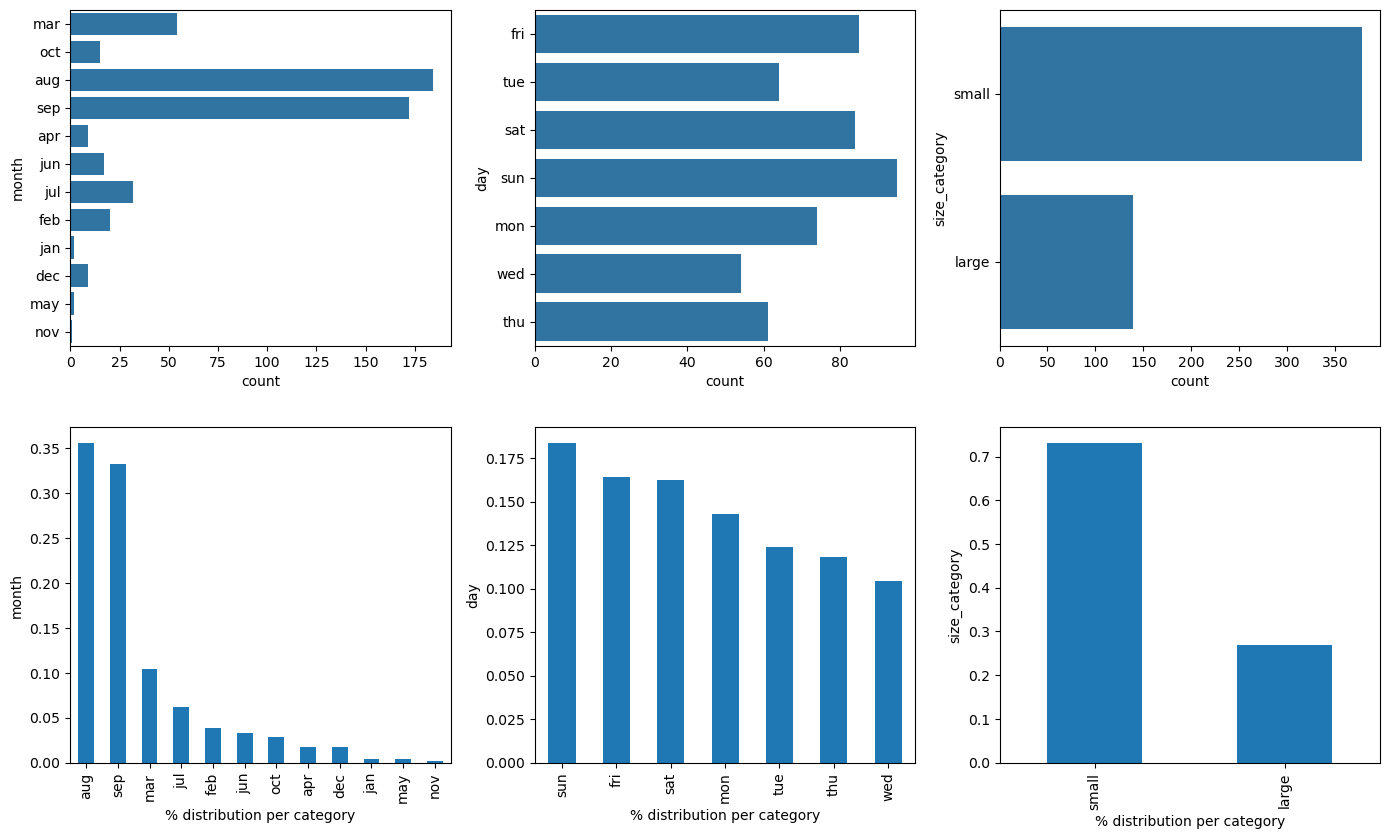

In [33]:
# Analyzing categorical columns

plt.figure(figsize=(14,12))

for i,col in enumerate(categorical_features,1):
    plt.subplot(3,3,i)
    sns.countplot(data=forestfires_data,y=col)
    plt.subplot(3,3,i+3)
    forestfires_data[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel("% distribution per category")
plt.tight_layout()
plt.show()

In [34]:
#  Bivariate Analysis

# Analyzing the relationship of categorical features with respect to the Target feature

print(forestfires_data["area"].describe(),"\n")

# A categorical variable based on forest fire area damage
# No damage, low, moderate, high, very high

df=forestfires_data.copy()
def area_cat(area):
    if area==0.0:
        return "No Damage"
    elif area <=1:
        return "Low"
    elif area <=25:
        return "moderate"
    elif area <=100:
        return "high"
    else:
        return "Very High"
    
df["damage_category"]=df["area"].apply(area_cat)
df.head()

count     517.000000
mean       12.847292
std        63.655818
min         0.000000
25%         0.000000
50%         0.520000
75%         6.570000
max      1090.840000
Name: area, dtype: float64 



,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category,damage_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small,No Damage
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small,No Damage
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small,No Damage
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small,No Damage
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small,No Damage


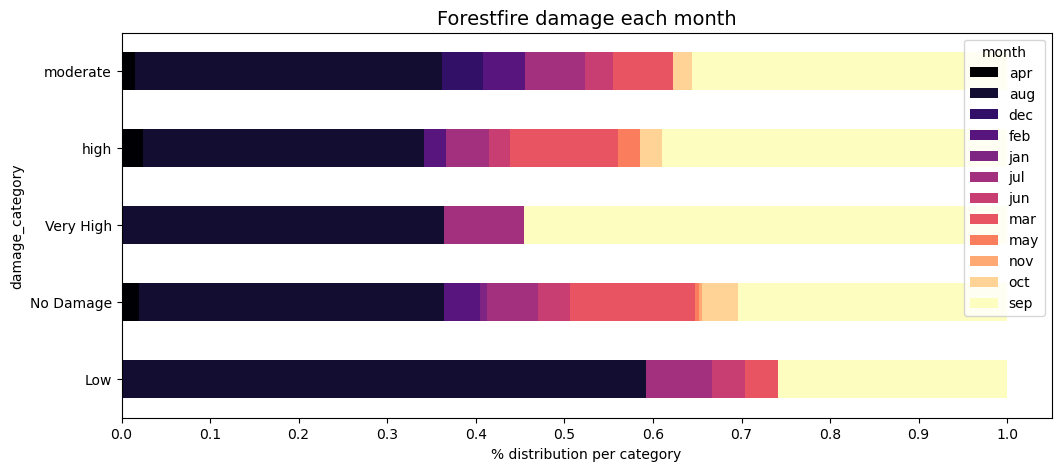

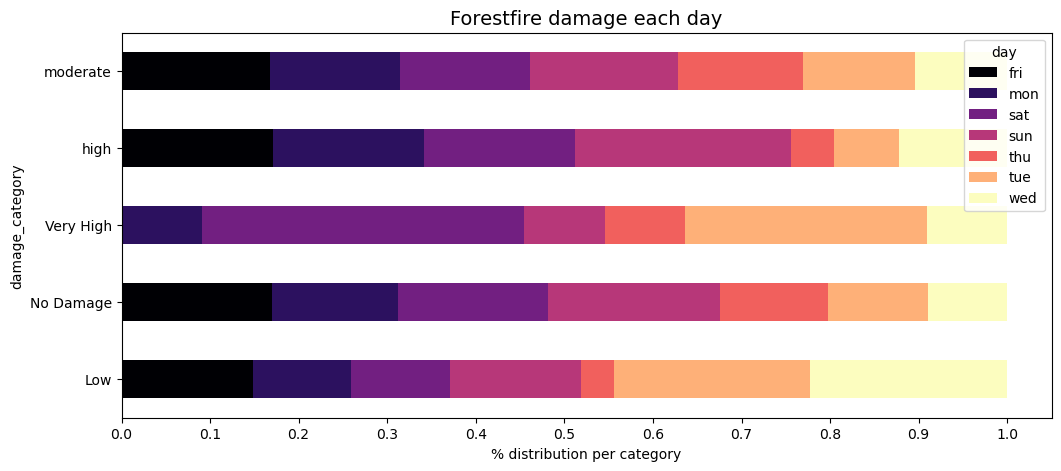

In [35]:

for col in categorical_features:
    if col!="size_category":
        cross=pd.crosstab(index=df["damage_category"],columns=df[col],normalize="index")
        cross.plot.barh(stacked=True,cmap="magma",figsize=(12,5))
        plt.xlabel("% distribution per category")
        plt.xticks(np.arange(0,1.1,0.1))
        plt.title("Forestfire damage each {}".format(col),fontsize=14)
plt.show()

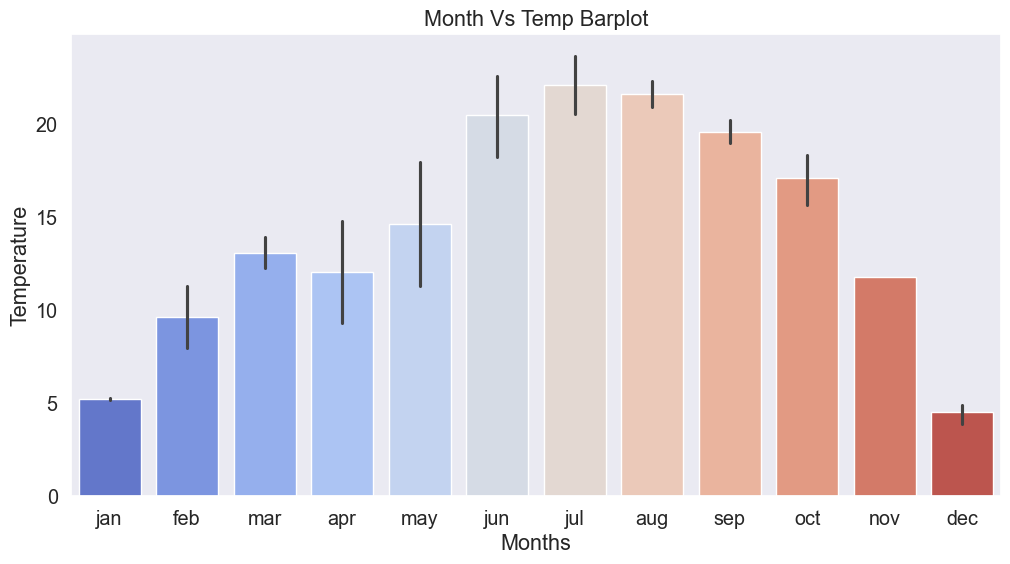

In [36]:
# Setting parameters

plt.rcParams['figure.figsize'] = [12,6]
sns.set(style = "dark", font_scale = 1.3)
month_temp = sns.barplot(x = 'month', y = 'temp', data = forestfires_data,
                         order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], palette = 'coolwarm')
month_temp.set(title = "Month Vs Temp Barplot", xlabel = "Months", ylabel = "Temperature");

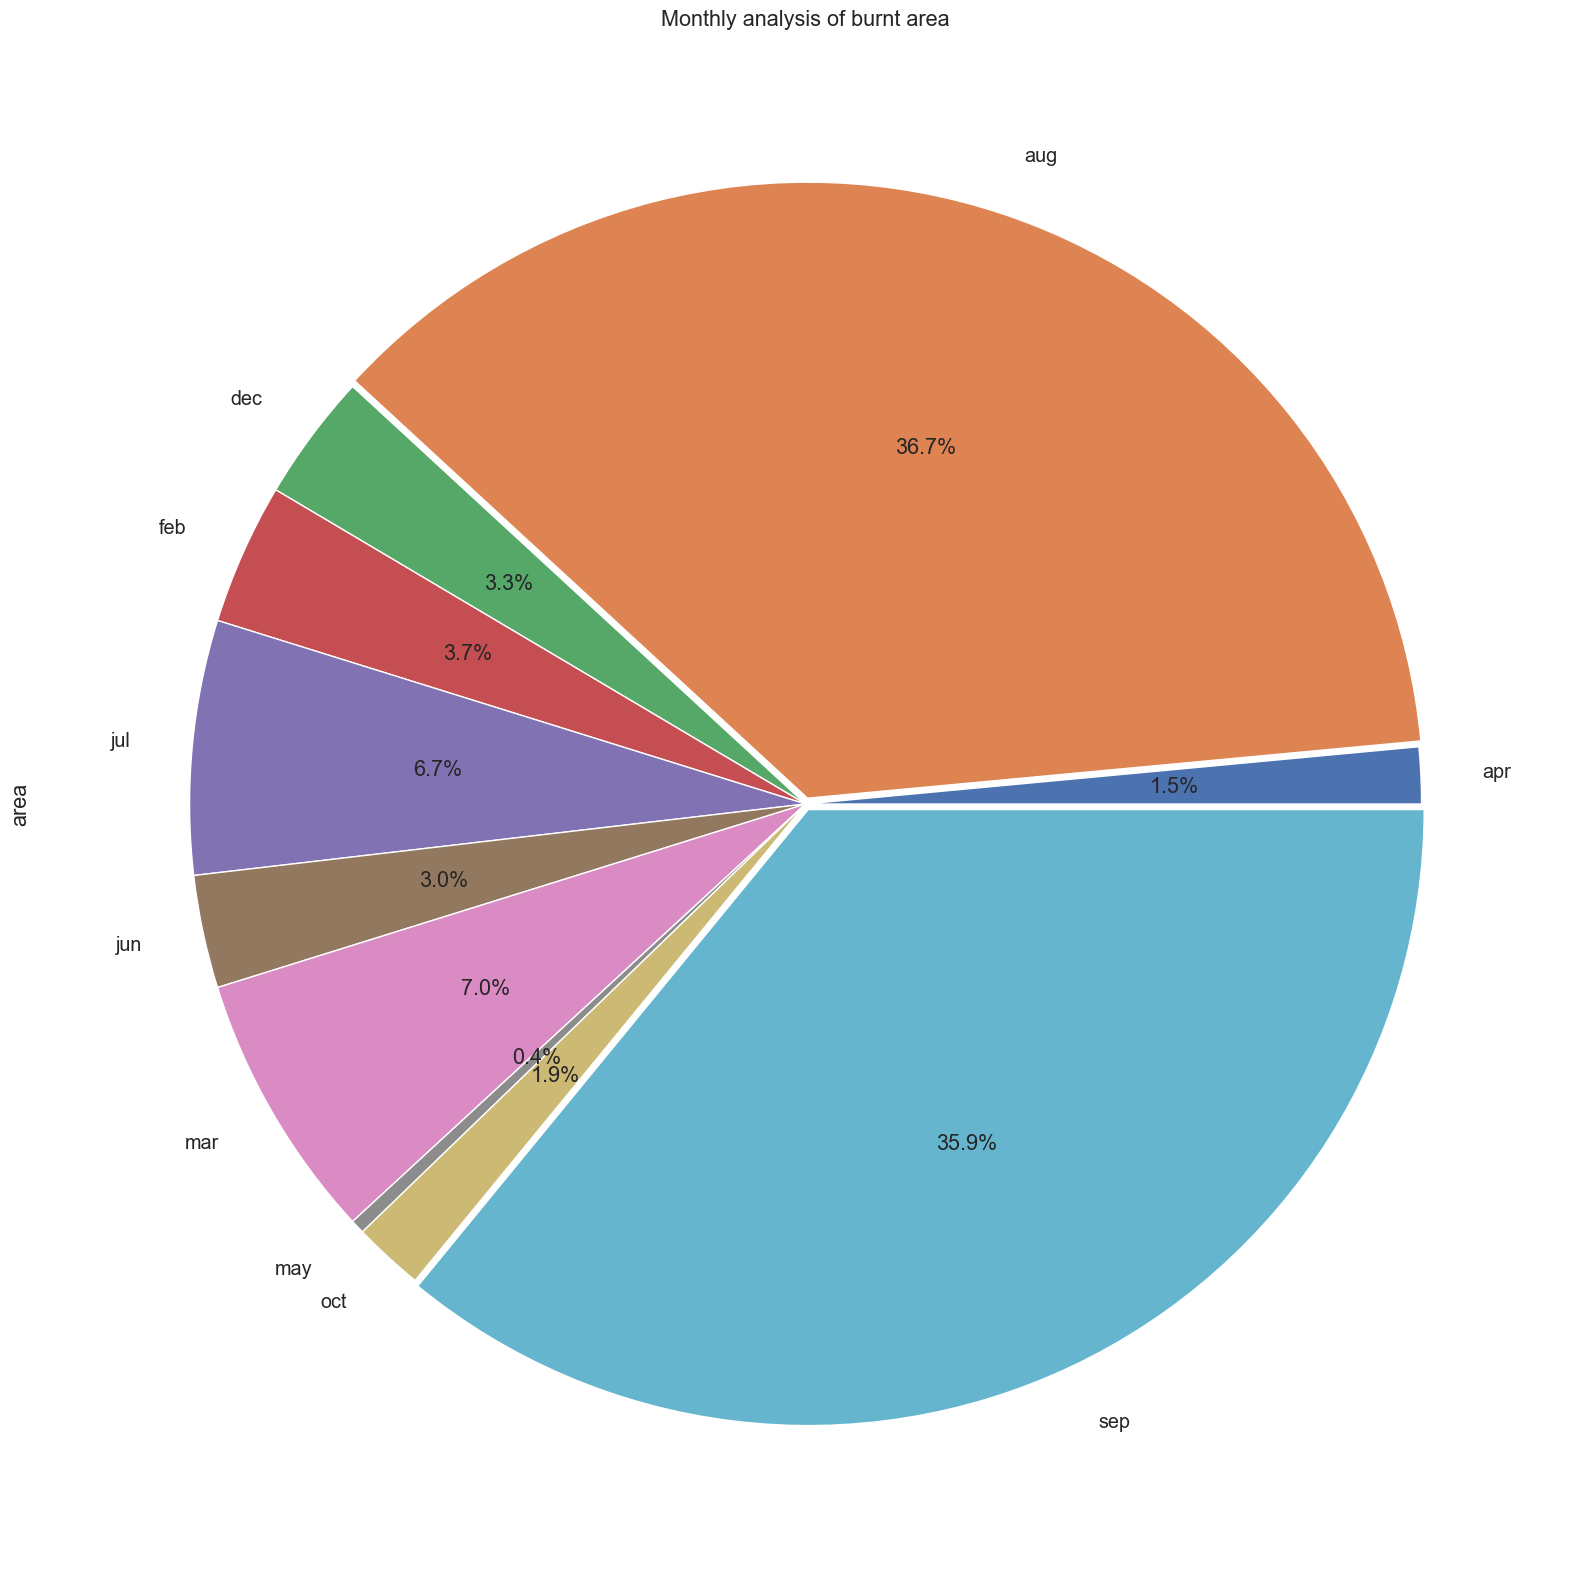

In [37]:
areaburnt = forestfires_data[forestfires_data['area']>0]
areaburnt.groupby('month')['area'].agg('count').plot(kind='pie',title='Monthly analysis of burnt area',figsize=(20,20),explode=[0,0.01,0,0,0,0,0,0,0,0.01],autopct='%0.1f%%')
plt.show()

In [38]:
import pandas as pd

# Assuming your DataFrame has columns 'month' and 'size_category'
# If the actual column names are different, please adjust accordingly

df1 = forestfires_data.copy()

# Define a dictionary to map abbreviated month names to full month names
order = {'month': {'jan': 'January', 'feb': 'February', 'mar': 'March', 'apr': 'April', 'may': 'May', 'jun': 'June',
                   'jul': 'July', 'aug': 'August', 'sep': 'September', 'oct': 'October', 'nov': 'November',
                   'dec': 'December'}}

# Replace abbreviated month names with full month names in the DataFrame
df1['month'] = df1['month'].replace(order['month'])

# Create a cross-tabulation of size_category and month
count_month_response_pct = pd.crosstab(df1['month'], df1['size_category']).apply(lambda x: x / x.sum() * 100)

# Create a DataFrame to store the analysis results
month = pd.DataFrame(count_month_response_pct.stack(), columns=['Percentage']).reset_index()

# Rename the columns for clarity
month.columns = ['Month', 'Size Category', 'Percentage']


# Define a custom order for months
custom_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Sort the DataFrame by the custom order of months
month['Month'] = pd.Categorical(month['Month'], categories=custom_order, ordered=True)
month = month.sort_values('Month')


# Display the resulting DataFrame
print(month)


        Month Size Category  Percentage
8     January         large    0.000000
9     January         small    0.529101
6    February         large    4.316547
7    February         small    3.703704
15      March         small   11.111111
14      March         large    8.633094
0       April         large    1.438849
1       April         small    1.851852
17        May         small    0.264550
16        May         large    0.719424
13       June         small    3.703704
12       June         large    2.158273
11       July         small    6.084656
10       July         large    6.474820
3      August         small   37.301587
2      August         large   30.935252
22  September         large   36.690647
23  September         small   32.010582
20    October         large    2.877698
21    October         small    2.910053
18   November         large    0.000000
19   November         small    0.264550
5    December         small    0.264550
4    December         large    5.755396


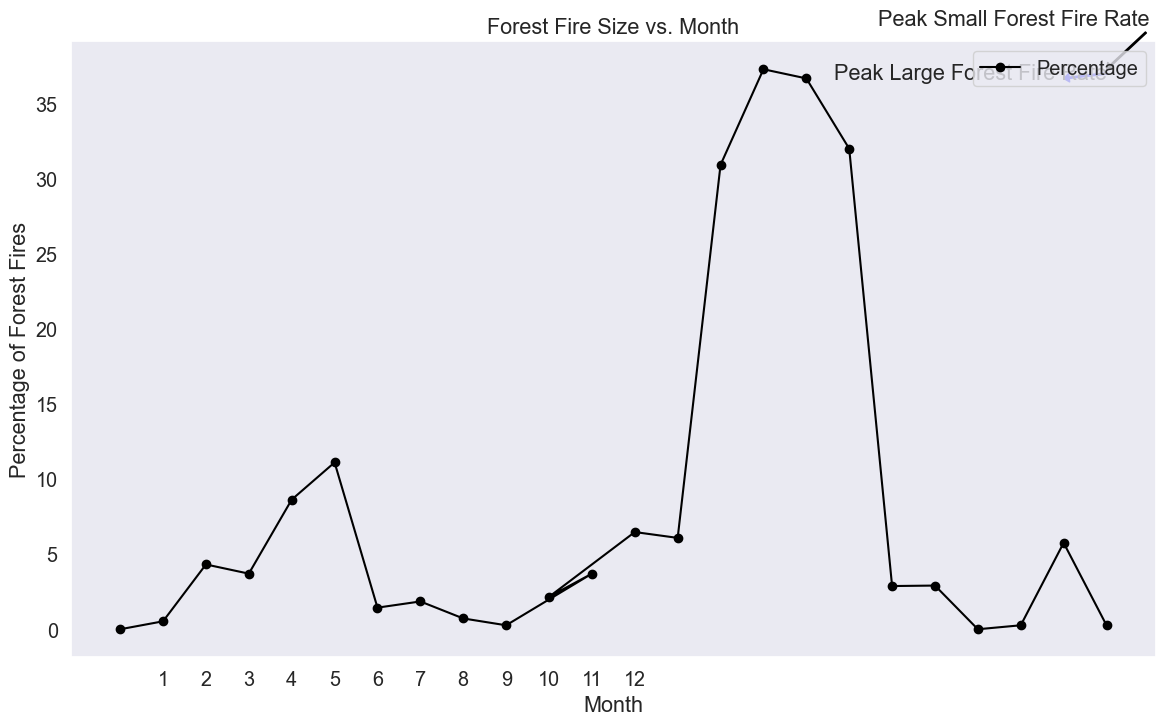

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming your DataFrame has columns 'month' and 'size_category'
# If the actual column names are different, please adjust accordingly

df1 = forestfires_data.copy()

# Define a dictionary to map abbreviated month names to their corresponding numerical order
order = {'month': {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}}

# Replace abbreviated month names with numerical order in the DataFrame
df1['month'] = df1['month'].replace(order['month'])

# Create a cross-tabulation of size_category and month
count_month_response_pct = pd.crosstab(df1['month'], df1['size_category']).apply(lambda x: x / x.sum() * 100)

# Create a DataFrame to store the analysis results
month = pd.DataFrame(count_month_response_pct.stack(), columns=['Percentage']).reset_index()

# Rename the columns for clarity
month.columns = ['Month', 'Size Category', 'Percentage']

# Sort the DataFrame by the numerical order of months
month = month.sort_values('Month')

# Plotting
plot_month = month[['Percentage']].plot(kind='line', figsize=(14, 8), marker='o', color=['black'])

plt.title('Forest Fire Size vs. Month')
plt.ylabel('Percentage of Forest Fires')
plt.xlabel('Month')

ticks = np.arange(1, 13, 1)
plt.xticks(ticks)

# Annotation: peak of Small fire rate
y_small = month[month['Size Category'] == 'small']['Percentage'].max()
x_small = month[month['Size Category'] == 'small']['Month'].idxmax()
plt.annotate('Peak Small Forest Fire Rate', xy=(x_small, y_small), xytext=(x_small + 1, y_small + 4),
             arrowprops=dict(color='black', headwidth=6, width=1, headlength=4),
             horizontalalignment='right', verticalalignment='top')

# Annotation: peak of large fire rate
y_large = month[month['Size Category'] == 'large']['Percentage'].max()
x_large = month[month['Size Category'] == 'large']['Month'].idxmax()
plt.annotate('Peak Large Forest Fire Rate', xy=(x_large, y_large), xytext=(x_large + 1, y_large + 1),
             arrowprops=dict(color='blue', headwidth=6, width=1, headlength=4),
             horizontalalignment='right', verticalalignment='top')

plt.show()


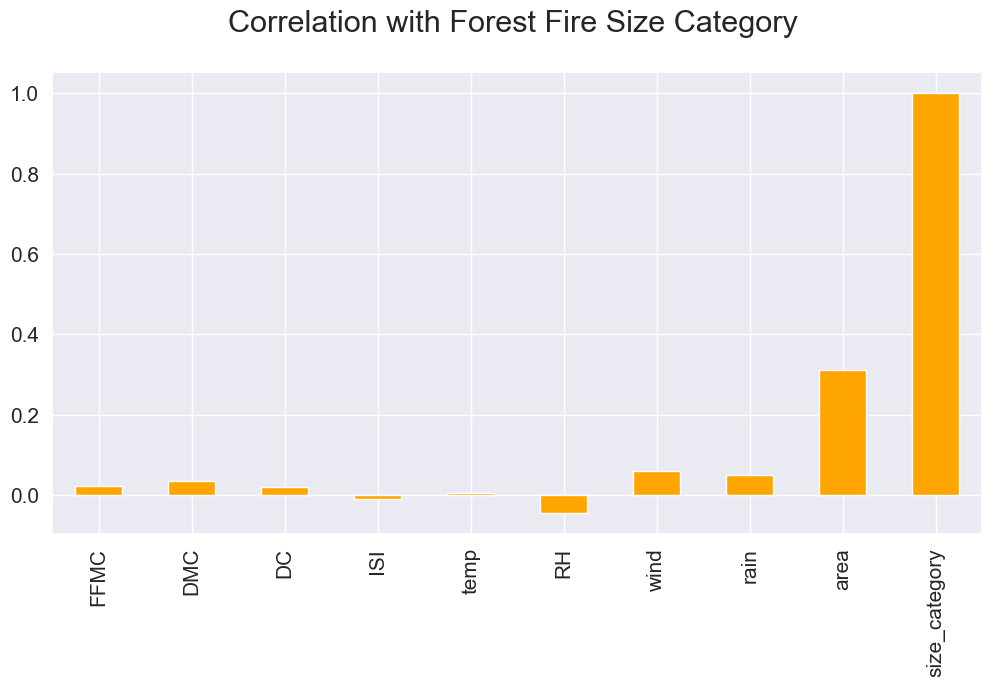

In [40]:

df = forestfires_data.copy()

# Convert 'size_category' to numeric (assuming it's currently a string)
df['size_category'] = np.where(df['size_category'].str.contains("large"), 1, 0).astype(int)

# One-hot encode the 'month' column
df = pd.get_dummies(df, columns=['month'], drop_first=True)

# Exclude non-numeric columns before calculating correlations
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlations = df[numeric_columns].corrwith(df['size_category'])
correlations = correlations[correlations != 1]

# Separate positive and negative correlations
positive_correlations = correlations[correlations > 0].sort_values(ascending=False)
negative_correlations = correlations[correlations < 0].sort_values(ascending=False)

# Plot correlations
correlations.plot.bar(figsize=(12,6 ), fontsize=15, color='orange', rot=90, grid=True)
plt.title('Correlation with Forest Fire Size Category \n', horizontalalignment="center", fontstyle="normal",
          fontsize="22", fontfamily="sans-serif")
plt.show()


In [41]:
# Analysis of the response column

forestfires_data.size_category.unique()


array(['small', 'large'], dtype=object)

In [42]:
# Checking for Imbalanced or balanced dataset with regards to the Target

countsizesmall = len(forestfires_data[forestfires_data.size_category == 'small'])
countsizelarge = len(forestfires_data[forestfires_data.size_category == 'large'])
print("Percentage of Small Forest Fire Size: {:.2f}%".format((countsizesmall / (len(forestfires_data.size_category))*100)))
print("Percentage of Large Foreset Fire Size: {:.2f}%".format((countsizelarge / (len(forestfires_data.size_category))*100)))

Percentage of Small Forest Fire Size: 73.11%
Percentage of Large Foreset Fire Size: 26.89%


In [43]:
forestfires_data.size_category.value_counts()


size_category
small    378
large    139
Name: count, dtype: int64

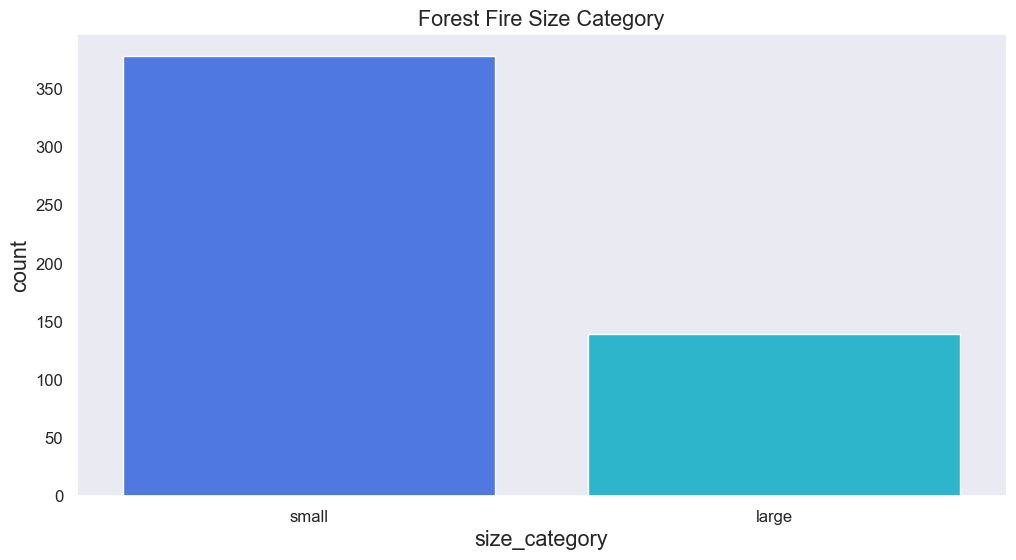

In [44]:
pal = sns.color_palette('rainbow')
sns.countplot(x='size_category', data= forestfires_data, palette = pal, order= forestfires_data['size_category'].value_counts().index)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Forest Fire Size Category');

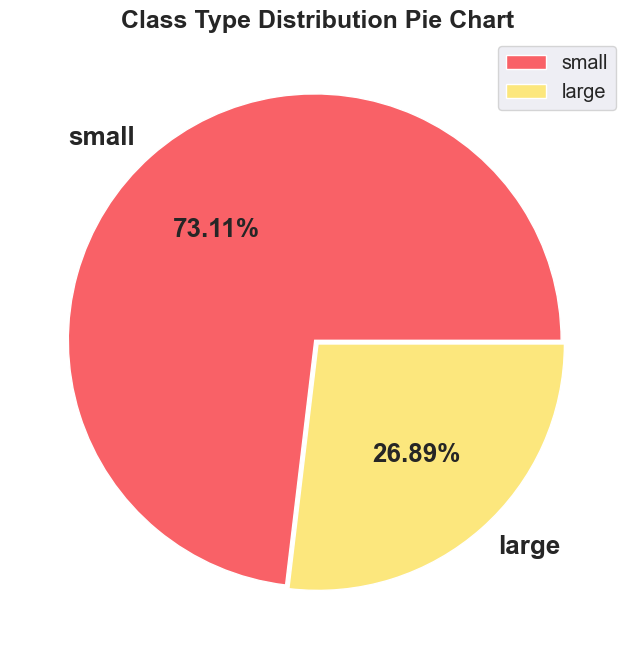

In [45]:
plt.figure(figsize = (8,8))
plt.pie(forestfires_data['size_category'].value_counts(), labels= forestfires_data.size_category.unique(),
        explode = [0.02,0.0], autopct= '%.2f%%', colors = ["#F96167", "#FCE77D"],
        textprops = {'size':'large', 'fontweight':'bold',})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

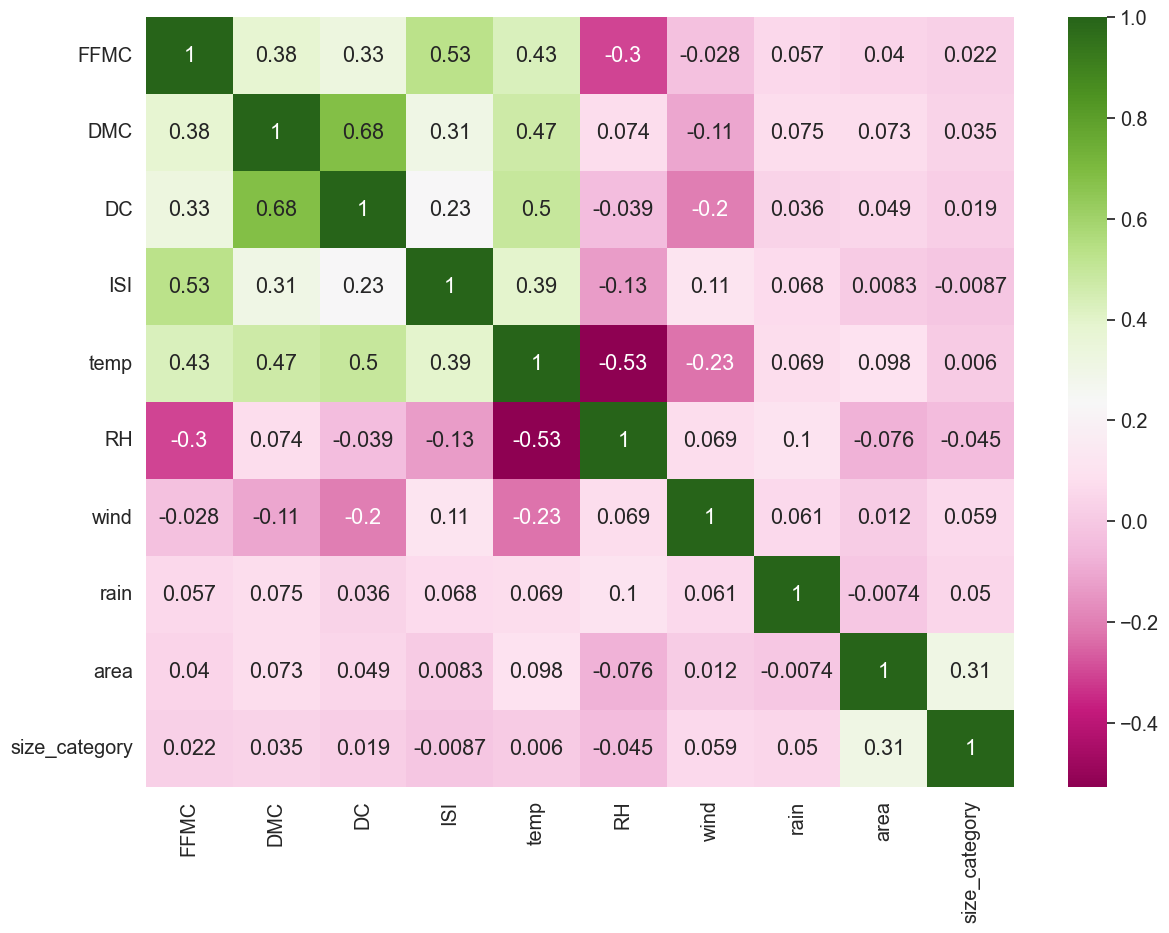

In [46]:
df = forestfires_data.copy()

# Convert 'size_category' to numeric (assuming it's currently a string)
df['size_category'] = np.where(df['size_category'].str.contains("large"), 1, 0).astype(int)

# One-hot encode the 'month' column
df = pd.get_dummies(df, columns=['month'], drop_first=True)

# Exclude non-numeric columns before calculating correlations
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_columns].corr()

# Plot the heatmap
fig, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(correlation_matrix,cmap="PiYG", annot=True, ax=ax)
plt.xticks(rotation=90)
plt.show()


In [47]:
# Data Pre-Processing

# Feature Engineering

continuous_feature=[feature for feature in forestfires_data.columns if forestfires_data[feature].dtype!="O"]
print("Continious Feature Count {}".format (len(continuous_feature)))

Continious Feature Count 9


In [48]:
forestfires_data[continuous_feature]


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [49]:
df_standard_scaled=forestfires_data.copy()
features=df_standard_scaled[continuous_feature]

In [50]:
scaler=StandardScaler()

df_standard_scaled[continuous_feature]=scaler.fit_transform(features.values)
df_standard_scaled.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,small
1,oct,tue,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,small
2,oct,sat,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,small
3,mar,fri,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,small
4,mar,sun,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,small


In [51]:
df = df_standard_scaled.copy()
df.drop('size_category',axis=1, inplace =True)
df = pd.get_dummies(df.iloc[:,:])
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False


In [52]:
# Converting Categorical Variable into Label by using Get Dummies FeatureData Pre-Processing

# Converting string value into binary classes such as if "large" than classify it as '1' else 'O'
df['size_category'] = forestfires_data.size_category
df['size_category'] = np.where(df['size_category'].str.contains("large"), 1, 0)
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,size_category
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,0
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,0
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,0
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,0
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,0


In [53]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# List of categorical columns to be encoded
categorical_columns = ['month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
                        'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
                        'month_oct', 'month_sep', 'day_fri', 'day_mon', 'day_sat', 'day_sun',
                        'day_thu', 'day_tue', 'day_wed', 'size_category']

# Apply label encoding to each categorical column
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Display the resulting DataFrame
print(df)
df.head()

         FFMC       DMC        DC       ISI      temp        RH      wind  \
0   -0.805959 -1.323326 -1.830477 -0.860946 -1.842640  0.411724  1.498614   
1   -0.008102 -1.179541  0.488891 -0.509688 -0.153278 -0.692456 -1.741756   
2   -0.008102 -1.049822  0.560715 -0.509688 -0.739383 -0.692456 -1.518282   
3    0.191362 -1.212361 -1.898266 -0.004756 -1.825402  3.233519 -0.009834   
4   -0.243833 -0.931043 -1.798600  0.126966 -1.291012  3.356206 -1.238940   
..        ...       ...       ...       ...       ...       ...       ...   
512 -1.640083 -0.846648  0.474768 -1.563460  1.536084 -0.753800 -0.736124   
513 -1.640083 -0.846648  0.474768 -1.563460  0.519019  1.638592  0.995798   
514 -1.640083 -0.846648  0.474768 -1.563460  0.398350  1.577248  1.498614   
515  0.680957  0.549003  0.269382  0.500176  1.156839 -0.140366 -0.009834   
516 -2.020879 -1.685913 -1.780442 -1.739089 -1.222058 -0.815143  0.269509   

         rain      area  month_apr  month_aug  month_dec  month_feb  \
0   

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,size_category
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [54]:
df.size_category.unique()


array([0, 1], dtype=int64)

In [55]:
# Feature Selection Technique

forestfires.drop(['month','day','area'] ,axis=1, inplace= True)


In [56]:
data1=forestfires.copy()
data1.drop("size_category",axis=1,inplace=True)
data1=pd.get_dummies(data1.iloc[:,:-1])
data1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [57]:
data1["size_category"]=df1.size_category
data1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,small


In [58]:
#Label Encoding for size column

le=LabelEncoder()
le.fit(data1["size_category"])
data1["size_category"]=le.transform(data1["size_category"])
data1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [59]:
# Split into input (X) and output (y) variables

X = data1.drop('size_category', axis = 1)
y=  data1.size_category

In [60]:
# Feature Extraction

test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)

In [61]:
# Summarize Scores

scores=fit.scores_
features=fit.transform(X)
score_df=pd.DataFrame(list(zip(scores,X.columns)),columns=["Score","Feature"])
score_df.sort_values(by="Score",ascending=False,inplace=True)
score_df

,Score,Feature
1,23.006108,DMC
2,21.872657,DC
17,17.601210,monthdec
5,6.350054,RH
7,5.216072,rain
6,1.440661,wind
16,1.157358,monthaug
12,0.964276,daythu
21,0.738170,monthjun
19,0.735450,monthjan


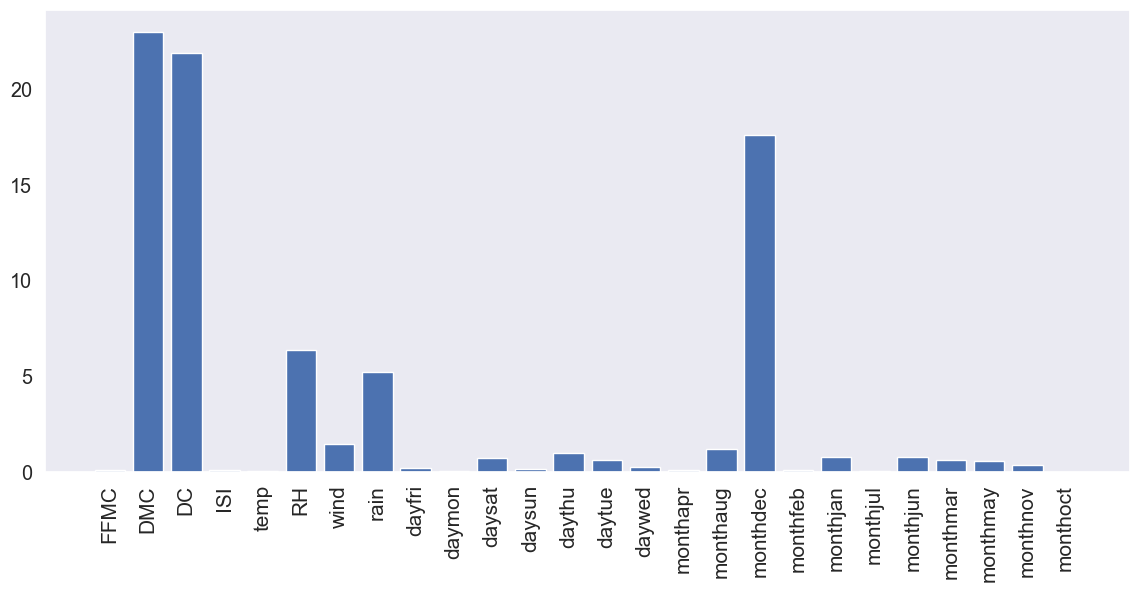

In [62]:

fig,axes=plt.subplots(figsize=(14,6))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks(range(len(scores)))
axes.set_xticklabels(X.columns.values)
plt.xticks(rotation=90,size=15)
plt.show()

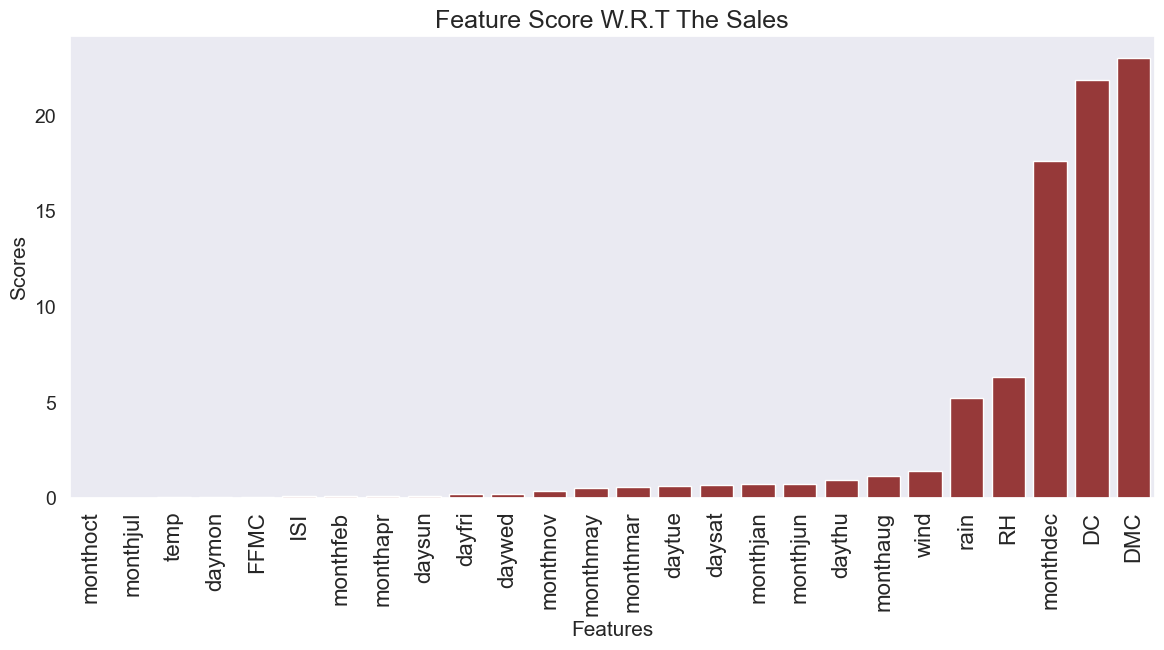

In [63]:

plt.figure(figsize=(14,6))
sns.barplot(x="Feature",y="Score",color="brown",data=score_df,order=score_df.sort_values("Score").Feature)
plt.xlabel("Features",size=15)
plt.ylabel("Scores",size=15)
plt.yticks(rotation=0,fontsize=14)
plt.xticks(rotation=90,fontsize=16)
plt.title("Feature Score W.R.T The Sales",size=18)
plt.show()

In [64]:
model_data=df[['DMC','DC','RH','rain','wind','area','month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep','size_category']]
model_data

,DMC,DC,RH,rain,wind,area,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,size_category
0,-1.323326,-1.830477,0.411724,-0.073268,1.498614,-0.202020,0,0,0,0,0,0,0,1,0,0,0,0,0
1,-1.179541,0.488891,-0.692456,-0.073268,-1.741756,-0.202020,0,0,0,0,0,0,0,0,0,0,1,0,0
2,-1.049822,0.560715,-0.692456,-0.073268,-1.518282,-0.202020,0,0,0,0,0,0,0,0,0,0,1,0,0
3,-1.212361,-1.898266,3.233519,0.603155,-0.009834,-0.202020,0,0,0,0,0,0,0,1,0,0,0,0,0
4,-0.931043,-1.798600,3.356206,-0.073268,-1.238940,-0.202020,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-0.846648,0.474768,-0.753800,-0.073268,-0.736124,-0.100753,0,1,0,0,0,0,0,0,0,0,0,0,1
513,-0.846648,0.474768,1.638592,-0.073268,0.995798,0.651674,0,1,0,0,0,0,0,0,0,0,0,0,1
514,-0.846648,0.474768,1.577248,-0.073268,1.498614,-0.026532,0,1,0,0,0,0,0,0,0,0,0,0,1
515,0.549003,0.269382,-0.140366,-0.073268,-0.009834,-0.202020,0,1,0,0,0,0,0,0,0,0,0,0,0


In [65]:
# Test Train Split With Imbalanced Dataset

x = model_data.drop('size_category',axis=1)
y = model_data[['size_category']]

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3, stratify=y)
len(x_train.columns)

18

In [67]:
# Hyperparameter Tuning

# Hyperparameter Tuning: Optimal Learning rate ,Number of Layers and Neurons

def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=100, step=32), activation='relu'))
    
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])), 
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model
    

In [68]:
tuner = RandomSearch(build_model, objective= 'val_accuracy', max_trials= 5, 
                     executions_per_trial=3, directory= 'project', project_name= 'Forest Fire')
tuner.search_space_summary()

Reloading Tuner from project\Forest Fire\tuner0.json
Search space summary
Default search space size: 18
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_v

In [69]:
tuner.search(x_train, y_train, epochs= 100, validation_data= (x_test, y_test))


In [70]:
tuner.results_summary()


Results summary
Results in project\Forest Fire
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 4 summary
Hyperparameters:
num_layers: 2
units_0: 32
units_1: 32
learning_rate: 0.001
units_2: 96
units_3: 96
units_4: 32
units_5: 32
units_6: 32
units_7: 64
units_8: 64
units_9: 96
units_10: 64
units_11: 96
units_12: 64
units_13: 32
units_14: 96
units_15: 64
Score: 0.9594017068545023

Trial 1 summary
Hyperparameters:
num_layers: 8
units_0: 96
units_1: 32
learning_rate: 0.001
units_2: 64
units_3: 32
units_4: 64
units_5: 64
units_6: 32
units_7: 96
units_8: 32
units_9: 96
units_10: 96
Score: 0.9487179319063822

Trial 3 summary
Hyperparameters:
num_layers: 11
units_0: 32
units_1: 96
learning_rate: 0.001
units_2: 64
units_3: 96
units_4: 96
units_5: 64
units_6: 32
units_7: 96
units_8: 32
units_9: 64
units_10: 32
units_11: 96
units_12: 96
units_13: 64
units_14: 32
units_15: 32
Score: 0.935897429784139

Trial 0 summary
Hyperparameters:
num_layers: 11
units_0: 32
units_1

In [71]:
# Hyperparameter Tuning: Optimal Batch_size, Number of Epochs

def create_model():
    model1 = Sequential()
    model1.add(Dense(64,input_dim=18,activation='relu'))
    model1.add(Dense(64,activation='relu'))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(units=1,activation="sigmoid"))
    
    adam = Adam(learning_rate=0.01)
    model1.compile(loss='binary_crossentropy',optimizer = adam,metrics=["accuracy"])
    return model1

In [72]:
model1 = KerasClassifier(build_fn= create_model, verbose=0)
batch_size = [10,20,40,50]
epochs = [10,50,100,200]
param_grid = dict(batch_size= batch_size, epochs=epochs)
grid = GridSearchCV(estimator= model1, param_grid= param_grid, cv= KFold(), verbose= 10)


In [73]:
grid_result = grid.fit(x_test,y_test)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START batch_size=10, epochs=10...................................



[CV 1/5; 1/16] END ....batch_size=10, epochs=10;, score=0.875 total time=   5.2s
[CV 2/5; 1/16] START batch_size=10, epochs=10...................................
[CV 2/5; 1/16] END ....batch_size=10, epochs=10;, score=0.968 total time=   3.0s
[CV 3/5; 1/16] START batch_size=10, epochs=10...................................
[CV 3/5; 1/16] END ....batch_size=10, epochs=10;, score=0.903 total time=   2.9s
[CV 4/5; 1/16] START batch_size=10, epochs=10...................................
[CV 4/5; 1/16] END ....batch_size=10, epochs=10;, score=0.968 total time=   3.0s
[CV 5/5; 1/16] START batch_size=10, epochs=10...................................
[CV 5/5; 1/16] END ....batch_size=10, epochs=10;, score=0.968 total time=   2.9s
[CV 1/5; 2/16] START batch_size=10, epochs=50...................................
[CV 1/5; 2/16] END ....batch_size=10, epochs=

In [74]:
print('Best {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{}, {} with {}".format(mean,stdev,param))

Best 0.9493951612903226, using {'batch_size': 20, 'epochs': 50}
0.9362903225806452, 0.03954080861977829 with {'batch_size': 10, 'epochs': 10}
0.942741935483871, 0.03610166013806355 with {'batch_size': 10, 'epochs': 50}
0.9491935483870968, 0.0370967741935484 with {'batch_size': 10, 'epochs': 100}
0.9491935483870968, 0.04233678951098933 with {'batch_size': 10, 'epochs': 200}
0.8784274193548388, 0.0683452873565556 with {'batch_size': 20, 'epochs': 10}
0.9493951612903226, 0.05798746007107293 with {'batch_size': 20, 'epochs': 50}
0.9493951612903226, 0.05427994505306338 with {'batch_size': 20, 'epochs': 100}
0.9491935483870968, 0.04233678951098933 with {'batch_size': 20, 'epochs': 200}
0.8463709677419355, 0.08701085965689001 with {'batch_size': 40, 'epochs': 10}
0.942741935483871, 0.03610166013806355 with {'batch_size': 40, 'epochs': 50}
0.9429435483870968, 0.05362903225806453 with {'batch_size': 40, 'epochs': 100}
0.9491935483870968, 0.04233678951098933 with {'batch_size': 40, 'epochs': 200

In [75]:
# Hyperparameter Tuning: Optimal Droupout rate

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
import numpy as np

# Assuming you have already imported necessary libraries and have 'model_data' defined

x = model_data.drop('size_category', axis=1)
y = model_data[['size_category']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3, stratify=y)

# Convert y_train to a 1D array
y_train_array = np.ravel(y_train)

# Wrapper class for KerasClassifier with dropout_rate as an initialization parameter
class MyKerasClassifier(KerasClassifier):
    def __init__(self, dropout_rate=0.0, **kwargs):
        self.dropout_rate = dropout_rate
        super(MyKerasClassifier, self).__init__(**kwargs)

    def _keras_build_fn(self, **kwargs):
        model2= Sequential()
        model2.add(Dense(64, input_shape=(18,), activation='relu'))
        model2.add(Dropout(self.dropout_rate))
        model2.add(Dense(64, activation='relu'))
        model2.add(Dropout(self.dropout_rate))
        model2.add(Dense(32, activation="relu"))
        model2.add(Dropout(self.dropout_rate))
        model2.add(Dense(units=1, activation="sigmoid"))

        adam = Adam(learning_rate=0.01)
        model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])
        return model2

# Use StratifiedKFold for binary classification
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=3)

# Define the parameter grid
param_grid = {'dropout_rate': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]}

# Create GridSearchCV with the wrapper class
model = MyKerasClassifier(build_fn=None, epochs=100, batch_size=10, verbose=0)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=stratified_cv, verbose=10)
grid_result = grid.fit(x_train, y_train_array)

# Print the best parameters and results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START dropout_rate=0.0............................................

[CV 1/5; 1/6] END .............dropout_rate=0.0;, score=0.959 total time=  11.7s
[CV 2/5; 1/6] START dropout_rate=0.0............................................
[CV 2/5; 1/6] END .............dropout_rate=0.0;, score=0.986 total time=  11.4s
[CV 3/5; 1/6] START dropout_rate=0.0............................................
[CV 3/5; 1/6] END .............dropout_rate=0.0;, score=0.931 total time=  11.3s
[CV 4/5; 1/6] START dropout_rate=0.0............................................
[CV 4/5; 1/6] END .............dropout_rate=0.0;, score=0.972 total time=  11.2s
[CV 5/5; 1/6] START dropout_rate=0.0............................................
[CV 5/5; 1/6] END .............dropout_rate=0.0;, score=0.972 total time=  11.2s
[CV 1/5; 2/6] START dropout_rate=0.1............................................
[CV 1/5; 2/6] END .............dropout_rate=0.1;

In [76]:
def toFindBestParams(x_train, y_train, x_test, y_test):

    # Defining list of hyperparameters
    batch_size_list = [5 , 10 , 15 , 20 ]
    epoch_list      = [5 , 10 , 50 , 100]
           
    # Initializing the trials
    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:
            
            # Create ANN model
            model = Sequential()
            
            # Defining the first layer of the model
            model.add(Dense(units=50, input_dim=x_train.shape[1], kernel_initializer='normal', activation='tanh'))
            
            # Defining the Second layer of the model
            model.add(Dense(units=6, kernel_initializer='normal', activation='tanh'))
 
            # The output neuron is a single fully connected node Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
 
            # Compiling the model
            model.compile(loss='binary_crossentropy', optimizer='adam',  metrics=['accuracy'])
 
            # Fitting the ANN to the Training set
            model_trained = model.fit(x_train, y_train ,batch_size = batch_trial, epochs = epochs_trial, verbose=0)
               
            # Fetching the accuracy of the training
            Accuracy_train = model_trained.history['accuracy'][-1]   
            
            # Printing the results of the current iteration
            print('batch_size:', batch_trial,'-', 'epochs:',epochs_trial, 'Accuracy:',Accuracy_train)

# Calling the function
toFindBestParams(x_train, y_train, x_test, y_test)


batch_size: 5 - epochs: 5 Accuracy: 0.8393352031707764
batch_size: 5 - epochs: 10 Accuracy: 0.9445983171463013
batch_size: 5 - epochs: 50 Accuracy: 0.9889196753501892
batch_size: 5 - epochs: 100 Accuracy: 0.9944598078727722
batch_size: 10 - epochs: 5 Accuracy: 0.7673130035400391
batch_size: 10 - epochs: 10 Accuracy: 0.8642659187316895
batch_size: 10 - epochs: 50 Accuracy: 0.9944598078727722
batch_size: 10 - epochs: 100 Accuracy: 0.9944598078727722
batch_size: 15 - epochs: 5 Accuracy: 0.7590027451515198
batch_size: 15 - epochs: 10 Accuracy: 0.81717449426651
batch_size: 15 - epochs: 50 Accuracy: 0.9833794832229614
batch_size: 15 - epochs: 100 Accuracy: 1.0
batch_size: 20 - epochs: 5 Accuracy: 0.7534626126289368
batch_size: 20 - epochs: 10 Accuracy: 0.7922437787055969
batch_size: 20 - epochs: 50 Accuracy: 0.9916897416114807
batch_size: 20 - epochs: 100 Accuracy: 0.9944598078727722


In [77]:
# Training Model - using best params

# create ANN model
model = Sequential()

# Defining the first layer of the model
model.add(Dense(units=50, input_dim=x_train.shape[1], kernel_initializer='normal', activation='tanh'))

# Defining the Second layer of the model
model.add(Dense(units=6, kernel_initializer='normal', activation='tanh'))
    
# The output neuron is a single fully connected node Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

# Training the model with best parameters
history = model.fit(x_train, y_train, validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
25/25 [==============================] - 3s 48ms/step - loss: 0.6879 - accuracy: 0.7095 - val_loss: 0.6841 - val_accuracy: 0.6833
Epoch 2/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6677 - accuracy: 0.7635 - val_loss: 0.6628 - val_accuracy: 0.6917
Epoch 3/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6244 - accuracy: 0.7635 - val_loss: 0.6242 - val_accuracy: 0.7167
Epoch 4/100
25/25 [==============================] - 0s 7ms/step - loss: 0.5697 - accuracy: 0.7676 - val_loss: 0.5914 - val_accuracy: 0.7250
Epoch 5/100
25/25 [==============================] - 0s 7ms/step - loss: 0.5347 - accuracy: 0.7718 - val_loss: 0.5751 - val_accuracy: 0.7333
Epoch 6/100
25/25 [==============================] - 0s 8ms/step - loss: 0.5149 - accuracy: 0.7759 - val_loss: 0.5631 - val_accuracy: 0.7333
Epoch 7/100
25/25 [==============================] - 0s 7ms/step - loss: 0.4970 - accuracy: 0.7842 - val_loss: 0.5505 - val_accuracy: 0.7417
Epoch 8/100


In [78]:
#  Model Evaluation Train and Test Error

scores = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 4ms/step - loss: 0.0991 - accuracy: 0.9768
accuracy: 97.68%


In [79]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

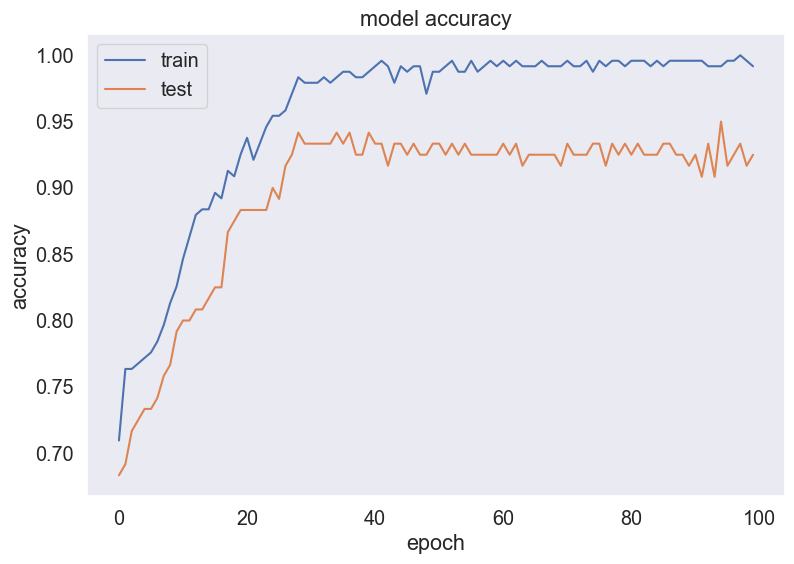

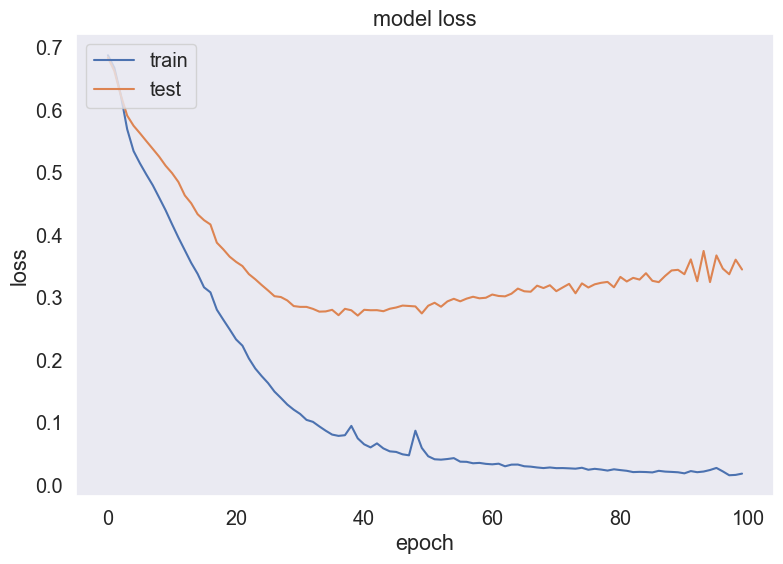

In [80]:
# Compare the train-set and test-set accuracy

# Check for overfitting and underfitting

# summarize history for accuracy
plt.figure(figsize=(9,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.figure(figsize=(9,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [81]:
# Predicting values from Model using same dataset

# generating predictions for test data
y_predict_test = model.predict(x_test) 

# creating table with test price & predicted price for test
test_prediction = pd.DataFrame()
test_prediction['Test_Actual'] = y_test.size_category
test_prediction['Test_Probability'] = y_predict_test
def probToBinary(varProb):
    if varProb >= 0.5:
        return 1
    else:
        return 0

# converting the probability of target variable to binary class of test data
test_prediction['Test_Predicted'] = test_prediction['Test_Probability'].apply(probToBinary)
print(test_prediction.shape)
test_prediction.head(10)

5/5 [==============================] - 0s 5ms/step
(156, 3)


,Test_Actual,Test_Probability,Test_Predicted
493,1,0.996901,1
298,0,0.001924,0
93,0,0.002256,0
437,0,0.002684,0
340,0,0.020538,0
7,0,0.002320,0
172,0,0.005587,0
76,0,0.002490,0
148,0,0.002728,0
104,0,0.001973,0


In [82]:
# generating predictions for train data
y_predict_train = model.predict(x_train)

# creating table with test price & predicted price for test
train_prediction = pd.DataFrame()
train_prediction['Train_Actual'] = y_train.size_category
train_prediction['Train_Probability'] = y_predict_train
train_prediction['Train_Predicted'] = train_prediction['Train_Probability'].apply(probToBinary)
print(train_prediction.shape)
train_prediction.head(10)

12/12 [==============================] - 0s 3ms/step
(361, 3)


,Train_Actual,Train_Probability,Train_Predicted
115,0,0.003089,0
130,0,0.002576,0
413,0,0.002495,0
350,0,0.014206,0
103,0,0.002195,0
511,0,0.002263,0
325,0,0.002250,0
473,1,0.996901,1
265,0,0.002408,0
226,1,0.996901,1


In [83]:
#  Classification Report


print("Accuracy score for Test Data    = ", np.round(accuracy_score(test_prediction['Test_Actual'],test_prediction['Test_Predicted']),2)*100,"%")
print("Confusion Matrix for Test Data  =\n", confusion_matrix(test_prediction['Test_Actual'],test_prediction['Test_Predicted']))
print("Classification Report for Test Data  =\n", classification_report(test_prediction['Test_Actual'],test_prediction['Test_Predicted']))



Accuracy score for Test Data    =  98.0 %
Confusion Matrix for Test Data  =
 [[112   2]
 [  1  41]]
Classification Report for Test Data  =
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       114
           1       0.95      0.98      0.96        42

    accuracy                           0.98       156
   macro avg       0.97      0.98      0.98       156
weighted avg       0.98      0.98      0.98       156



In [84]:
print("Accuracy score for Train Data    = ", np.round(accuracy_score(train_prediction['Train_Actual'],train_prediction['Train_Predicted']),2)*100,"%")
print("Confusion Matrix for Train Data  =\n", confusion_matrix(train_prediction['Train_Actual'],train_prediction['Train_Predicted']))
print("Classification Report for Train Data  =\n", classification_report(train_prediction['Train_Actual'],train_prediction['Train_Predicted']))


Accuracy score for Train Data    =  98.0 %
Confusion Matrix for Train Data  =
 [[261   3]
 [  6  91]]
Classification Report for Train Data  =
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       264
           1       0.97      0.94      0.95        97

    accuracy                           0.98       361
   macro avg       0.97      0.96      0.97       361
weighted avg       0.97      0.98      0.97       361



In [85]:
# Neural Networks model using Linear Kernel has great predictive power to identify the fire size that would be either small or large int the Forest.

# print the scores on training and test set
y_predict_test = model.predict(x_test) 
y_predict_train = model.predict(x_train)
print('Training set score : {:.2f}%'.format(accuracy_score(train_prediction['Train_Actual'], train_prediction['Train_Predicted'])*100))

print('Test set score     : {:.2f}%'.format(accuracy_score(test_prediction['Test_Actual'], test_prediction['Test_Predicted'])*100))


12/12 [==============================] - 0s 3ms/step
Training set score : 97.51%
Test set score     : 98.08%


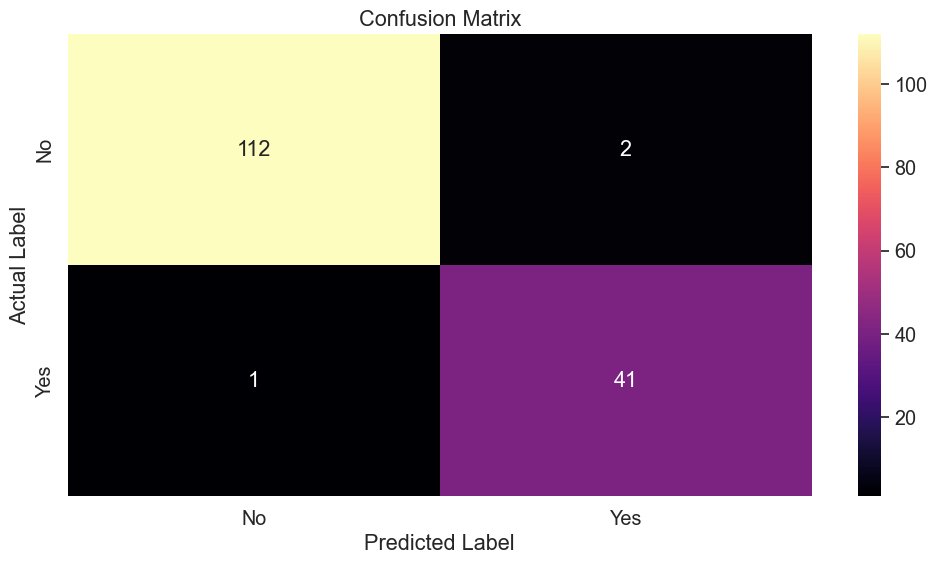

In [86]:
# Confusion matrix

cm_df = confusion_matrix(test_prediction['Test_Actual'], test_prediction['Test_Predicted'])
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)

sns.heatmap(df_cm, annot = True, fmt = "d",cmap="magma")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

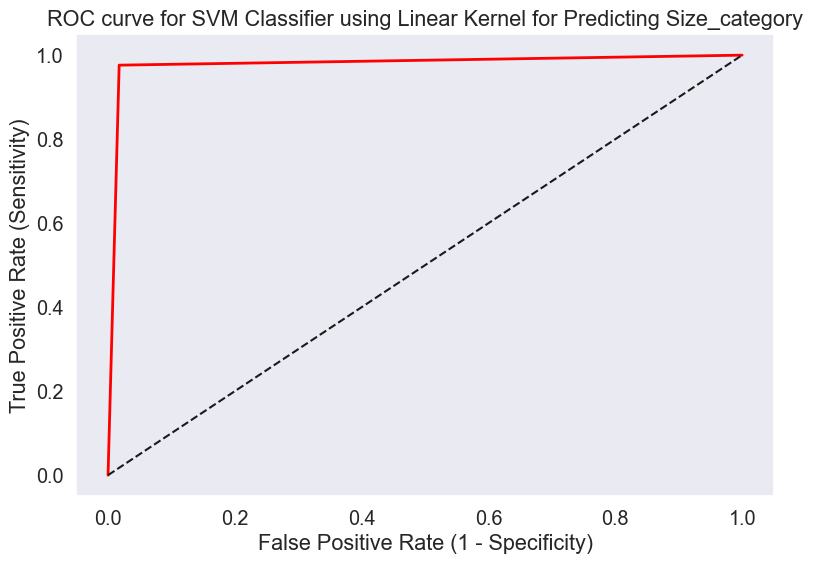

ROC AUC : 0.9793


In [87]:
# ROC - AUC Curve

plt.figure(figsize=(9,6))
fpr, tpr, thresholds = roc_curve(test_prediction['Test_Actual'], test_prediction['Test_Predicted'])
plt.plot(fpr, tpr, linewidth=2, color='red')
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for SVM Classifier using Linear Kernel for Predicting Size_category')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

ROC_AUC = roc_auc_score(test_prediction['Test_Actual'], test_prediction['Test_Predicted'])
print('ROC AUC : {:.4f}'.format(ROC_AUC))

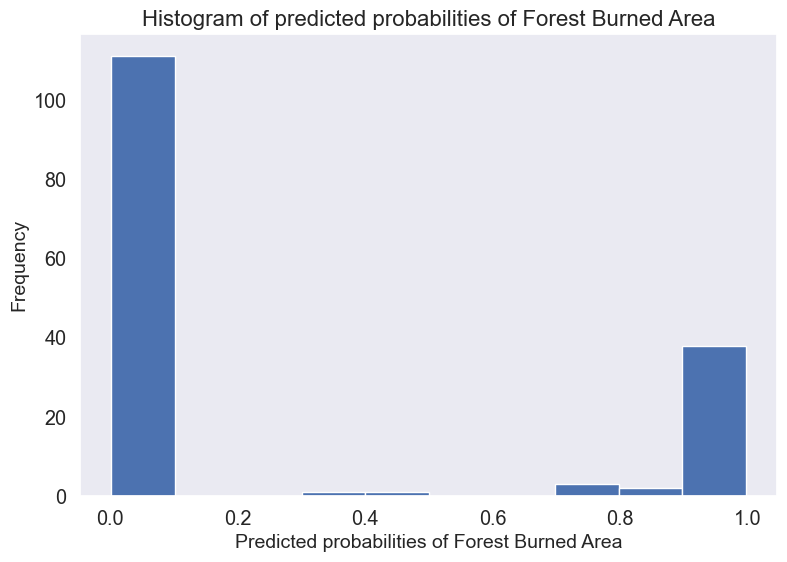

In [88]:
# Plot histogram of predicted probabilities

plt.figure(figsize=(9,6))
plt.hist(test_prediction['Test_Probability'], bins = 10)
plt.title('Histogram of predicted probabilities of Forest Burned Area', fontsize=16)
plt.xlabel('Predicted probabilities of Forest Burned Area', fontsize=14)
plt.ylabel('Frequency', fontsize=14);